In [63]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import certifi
import ssl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier


from sklearn.linear_model import LogisticRegression



os.environ['SSL_CERT_FILE'] = '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/certifi/cacert.pem'

In [64]:
url = "https://raw.githubusercontent.com/5ah/Football-Predictor/main/filtered_matches.csv"
matches = pd.read_csv(url, sep=',')
url2 = "https://raw.githubusercontent.com/5ah/Football-Predictor/main/updated_countries.csv"
countries = pd.read_csv(url2, sep=',')

countries

In [65]:
data = pd.merge(matches, countries, how='inner', left_on='home_team', right_on='Country')
data = pd.merge(data, countries, how='inner', left_on='away_team', right_on='Country', suffixes=('_home', '_away'))
data

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,Country_home,Normalized Offensive Rating_home,Normalized Defensive Rating_home,Goal Difference_home,Goal Scoring Rate_home,Country_away,Normalized Offensive Rating_away,Normalized Defensive Rating_away,Goal Difference_away,Goal Scoring Rate_away
0,2014-05-28,Nigeria,Scotland,2,2,Friendly,London,England,True,TIE,Nigeria,1.21194,1.08731,46.0,1.18966,Scotland,1.07004,1.23730,28.0,1.32609
1,2023-06-17,Norway,Scotland,1,2,UEFA Euro qualification,Oslo,Norway,False,Scotland,Norway,1.33516,0.98671,41.0,1.31443,Scotland,1.07004,1.23730,28.0,1.32609
2,2018-06-02,Mexico,Scotland,1,0,Friendly,Mexico City,Mexico,False,Mexico,Mexico,1.31591,0.99915,62.0,1.30120,Scotland,1.07004,1.23730,28.0,1.32609
3,2021-09-07,Austria,Scotland,0,1,FIFA World Cup qualification,Vienna,Austria,False,Scotland,Austria,1.51593,0.86824,8.0,1.30303,Scotland,1.07004,1.23730,28.0,1.32609
4,2022-03-29,Austria,Scotland,2,2,Friendly,Vienna,Austria,False,TIE,Austria,1.51593,0.86824,8.0,1.30303,Scotland,1.07004,1.23730,28.0,1.32609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,2023-09-12,Italy,Ukraine,2,1,UEFA Euro qualification,Milan,Italy,False,Italy,Italy,1.35939,0.96716,58.0,1.28696,Ukraine,1.88251,0.69669,35.0,1.22500
1535,2021-06-29,Sweden,Ukraine,1,2,UEFA Euro,Glasgow,Scotland,True,Ukraine,Sweden,2.02163,0.65332,56.0,1.24590,Ukraine,1.88251,0.69669,35.0,1.22500
1536,2019-11-17,Serbia,Ukraine,2,2,UEFA Euro qualification,Belgrade,Serbia,False,TIE,Serbia,1.71456,0.76641,23.0,1.43627,Ukraine,1.88251,0.69669,35.0,1.22500
1537,2022-06-01,Scotland,Ukraine,1,3,FIFA World Cup qualification,Glasgow,Scotland,False,Ukraine,Scotland,1.07004,1.23730,28.0,1.32609,Ukraine,1.88251,0.69669,35.0,1.22500


In [66]:
# Drop unnecessary columns
data = data.drop(['Country_home', 'Country_away'], axis=1)

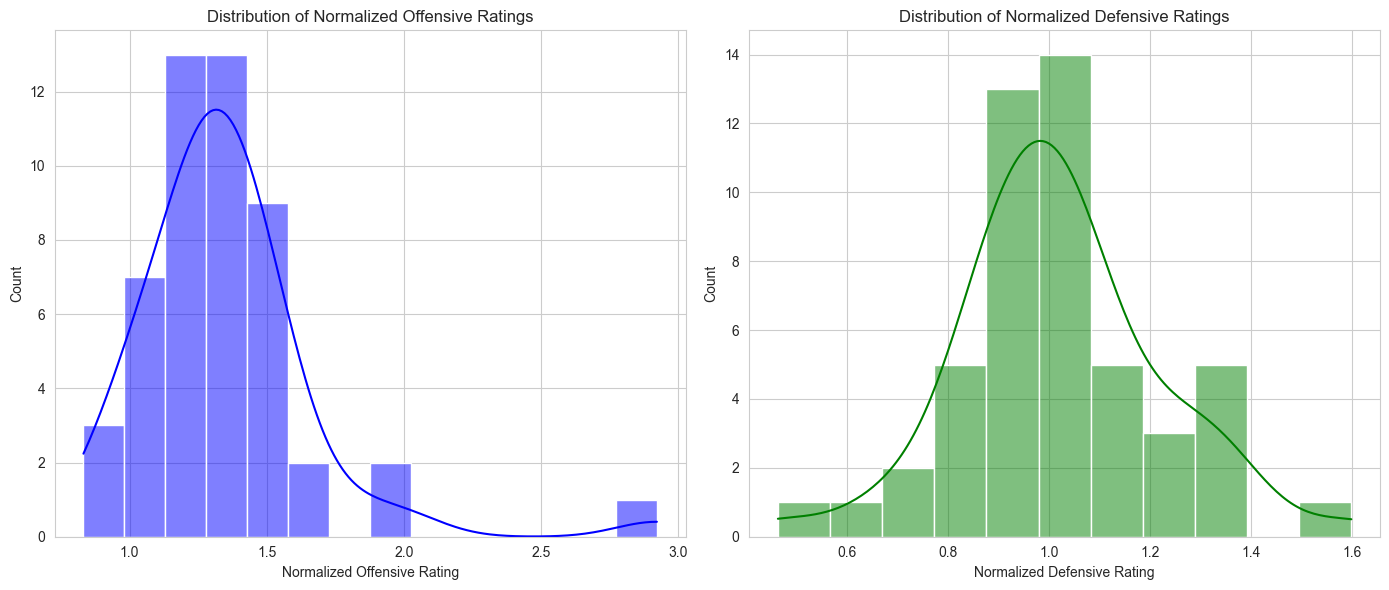

In [67]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting Histogram of Normalized Offensive and Defensive Ratings
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(countries['Normalized Offensive Rating'], kde=True, color='blue')
plt.title('Distribution of Normalized Offensive Ratings')

plt.subplot(1, 2, 2)
sns.histplot(countries['Normalized Defensive Rating'], kde=True, color='green')
plt.title('Distribution of Normalized Defensive Ratings')

plt.tight_layout()
plt.show()


/var/folders/wz/jrjrb_q94hl1y39g96yvv9h40000gn/T/ipykernel_52750/2680406376.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Goal Scoring Rate', y='Country', data=top_goal_scoring_countries, palette="coolwarm")


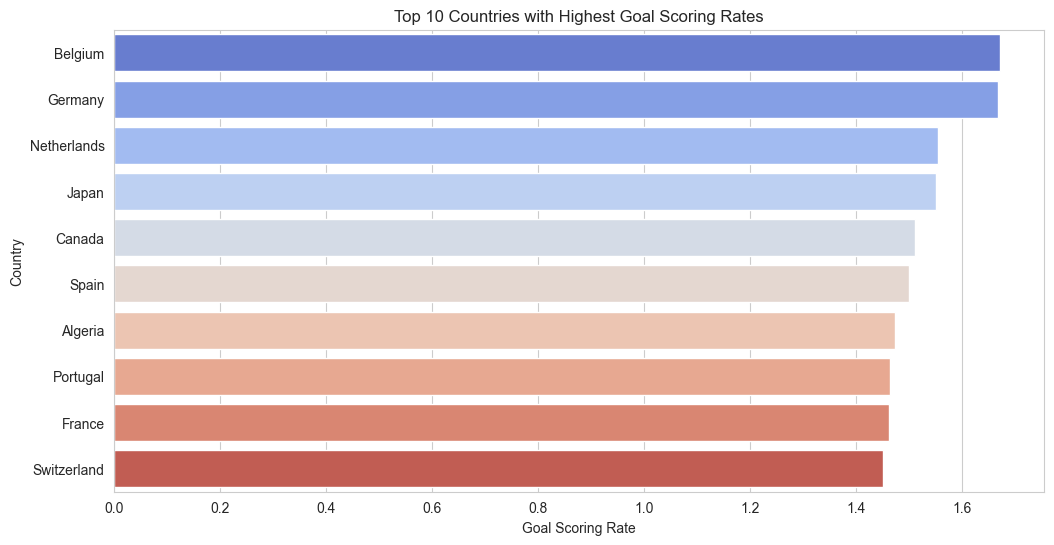

In [68]:
# Bar chart of Top 10 countries with highest Goal Scoring Rates
top_goal_scoring_countries = countries.nlargest(10, 'Goal Scoring Rate')

plt.figure(figsize=(12, 6))
sns.barplot(x='Goal Scoring Rate', y='Country', data=top_goal_scoring_countries, palette="coolwarm")
plt.title('Top 10 Countries with Highest Goal Scoring Rates')
plt.show()


In [69]:
data

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,Normalized Offensive Rating_home,Normalized Defensive Rating_home,Goal Difference_home,Goal Scoring Rate_home,Normalized Offensive Rating_away,Normalized Defensive Rating_away,Goal Difference_away,Goal Scoring Rate_away
0,2014-05-28,Nigeria,Scotland,2,2,Friendly,London,England,True,TIE,1.21194,1.08731,46.0,1.18966,1.07004,1.23730,28.0,1.32609
1,2023-06-17,Norway,Scotland,1,2,UEFA Euro qualification,Oslo,Norway,False,Scotland,1.33516,0.98671,41.0,1.31443,1.07004,1.23730,28.0,1.32609
2,2018-06-02,Mexico,Scotland,1,0,Friendly,Mexico City,Mexico,False,Mexico,1.31591,0.99915,62.0,1.30120,1.07004,1.23730,28.0,1.32609
3,2021-09-07,Austria,Scotland,0,1,FIFA World Cup qualification,Vienna,Austria,False,Scotland,1.51593,0.86824,8.0,1.30303,1.07004,1.23730,28.0,1.32609
4,2022-03-29,Austria,Scotland,2,2,Friendly,Vienna,Austria,False,TIE,1.51593,0.86824,8.0,1.30303,1.07004,1.23730,28.0,1.32609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,2023-09-12,Italy,Ukraine,2,1,UEFA Euro qualification,Milan,Italy,False,Italy,1.35939,0.96716,58.0,1.28696,1.88251,0.69669,35.0,1.22500
1535,2021-06-29,Sweden,Ukraine,1,2,UEFA Euro,Glasgow,Scotland,True,Ukraine,2.02163,0.65332,56.0,1.24590,1.88251,0.69669,35.0,1.22500
1536,2019-11-17,Serbia,Ukraine,2,2,UEFA Euro qualification,Belgrade,Serbia,False,TIE,1.71456,0.76641,23.0,1.43627,1.88251,0.69669,35.0,1.22500
1537,2022-06-01,Scotland,Ukraine,1,3,FIFA World Cup qualification,Glasgow,Scotland,False,Ukraine,1.07004,1.23730,28.0,1.32609,1.88251,0.69669,35.0,1.22500


/var/folders/wz/jrjrb_q94hl1y39g96yvv9h40000gn/T/ipykernel_52750/3425753535.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Home Goals', 'Away Goals'], y=[home_goals, away_goals], palette="viridis")


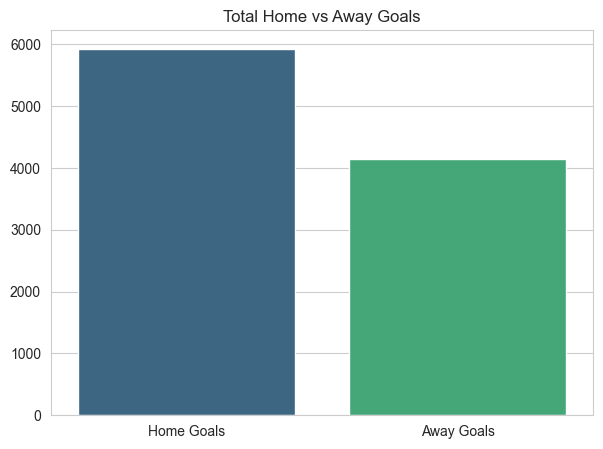

In [70]:
# Home vs Away Goals Analysis
home_goals = matches['home_score'].sum()
away_goals = matches['away_score'].sum()

plt.figure(figsize=(7, 5))
sns.barplot(x=['Home Goals', 'Away Goals'], y=[home_goals, away_goals], palette="viridis")
plt.title('Total Home vs Away Goals')
plt.show()


In [71]:
# Define features and target
features = ['Normalized Offensive Rating_home', 'Normalized Defensive Rating_home', 'Goal Difference_home', 'Goal Scoring Rate_home',
            'Normalized Offensive Rating_away', 'Normalized Defensive Rating_away', 'Goal Difference_away', 'Goal Scoring Rate_away']
target = 'winner'

In [72]:
# Map winner to binary outcome: 1 for home team, 0 for away team
data['winner_binary'] = data.apply(lambda row: 1 if row['winner'] == row['home_team'] else 0, axis=1)



In [73]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data['winner_binary'], test_size=0.2, random_state=42)


In [74]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=3000)

In [75]:
# Make predictions on the test set
predictions = model.predict(X_test)


In [76]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
classification_report_result = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_report_result}')

Accuracy: 0.5584415584415584
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.86      0.66       155
           1       0.64      0.25      0.36       153

    accuracy                           0.56       308
   macro avg       0.59      0.56      0.51       308
weighted avg       0.59      0.56      0.51       308



In [77]:
model_svm = SVC()
model_svm.fit(X_train, y_train)
predictions_svm = model_svm.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, predictions_svm)
classification_report_result_svm = classification_report(y_test, predictions_svm)

print(f'Accuracy: {accuracy_svm}')
print(f'Classification Report:\n{classification_report_result_svm}')

Accuracy: 0.5844155844155844
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.85      0.67       155
           1       0.68      0.31      0.43       153

    accuracy                           0.58       308
   macro avg       0.62      0.58      0.55       308
weighted avg       0.62      0.58      0.55       308



In [78]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
predictions_knn = model_knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, predictions_knn)
classification_report_result_knn = classification_report(y_test, predictions_knn)

print(f'Accuracy: {accuracy_knn}')
print(f'Classification Report:\n{classification_report_result_knn}')

Accuracy: 0.6461038961038961
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.76      0.68       155
           1       0.69      0.53      0.60       153

    accuracy                           0.65       308
   macro avg       0.65      0.65      0.64       308
weighted avg       0.65      0.65      0.64       308



model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
predictions_rf = model_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, predictions_rf)
classification_report_result_rf = classification_report(y_test, predictions_rf)

print(f'Accuracy: {accuracy_rf}')
print(f'Classification Report:\n{classification_report_result_rf}')

In [79]:
# Choose two teams for the match
team_home = 'Brazil'  # Replace with the desired home team
team_away = 'France'     # Replace with the desired away team

# Get the statistics for the chosen teams
team_home_stats = countries[countries['Country'] == team_home]
team_away_stats = countries[countries['Country'] == team_away]

# Create a DataFrame for the match
match_data = pd.DataFrame({
    'Normalized Offensive Rating_home': team_home_stats['Normalized Offensive Rating'].values,
    'Normalized Defensive Rating_home': team_home_stats['Normalized Defensive Rating'].values,
    'Goal Difference_home': team_home_stats['Goal Difference'].values,
    'Goal Scoring Rate_home': team_home_stats['Goal Scoring Rate'].values,
    'Normalized Offensive Rating_away': team_away_stats['Normalized Offensive Rating'].values,
    'Normalized Defensive Rating_away': team_away_stats['Normalized Defensive Rating'].values,
    'Goal Difference_away': team_away_stats['Goal Difference'].values,
    'Goal Scoring Rate_away': team_away_stats['Goal Scoring Rate'].values
})

# Standardize features for the match
scaler = StandardScaler()
match_data[features] = scaler.fit_transform(match_data[features])

# Initialize and train the logistic regression model (using the entire dataset for simplicity)
model = LogisticRegression(max_iter=5000)
model.fit(data[features], data['winner_binary'])

# Make a prediction for the match
prediction = model.predict(match_data[features])

# Interpret the prediction
if prediction == 1:
    print(f"{team_home} is predicted to win.")
else:
    print(f"{team_away} is predicted to win.")

# Print match results between the two teams
team_home_matches = matches[(matches['home_team'] == team_home) & (matches['away_team'] == team_away)]
team_away_matches = matches[(matches['home_team'] == team_away) & (matches['away_team'] == team_home)]

if not team_home_matches.empty:
    print(f"\n{team_home}'s matches against {team_away}:\n")
    print(team_home_matches[['date', 'home_team', 'away_team', 'home_score', 'away_score', 'winner']])
    
if not team_away_matches.empty:
    print(f"\n{team_away}'s matches against {team_home}:\n")
    print(team_away_matches[['date', 'home_team', 'away_team', 'home_score', 'away_score', 'winner']])

# Initialize and train the SVM model (using the entire dataset for simplicity)
model_svm = SVC()
model_svm.fit(data[features], data['winner_binary'])

# Make a prediction for the match using SVM
prediction_svm = model_svm.predict(match_data[features])

# Interpret the SVM prediction
if prediction_svm == 1:
    print(f"{team_home} is predicted to win using SVM.")
else:
    print(f"{team_away} is predicted to win using SVM.")

# Initialize and train the kNN model (using the entire dataset for simplicity)
model_knn = KNeighborsClassifier()
model_knn.fit(data[features], data['winner_binary'])

# Make a prediction for the match using kNN
prediction_knn = model_knn.predict(match_data[features])

# Interpret the kNN prediction
if prediction_knn == 1:
    print(f"{team_home} is predicted to win using kNN.")
else:
    print(f"{team_away} is predicted to win using kNN.")

France is predicted to win.

France's matches against Brazil:

           date home_team away_team  home_score  away_score  winner
407  2015-03-26    France    Brazil           1           3  Brazil
France is predicted to win using SVM.
France is predicted to win using kNN.


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Standardize the features (mean=0 and variance=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    # 'penalty': ['l1', 'l2'],  # Remove 'penalty' or use only 'l2'
}

# Create the Logistic Regression model
model_lr = LogisticRegression(random_state=42, solver='lbfgs')  # Specify solver

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model_lr, param_grid, cv=5, scoring='accuracy', error_score='raise')
grid_search.fit(X_train_scaled, y_train)

# Get the best model from the grid search
best_model_lr = grid_search.best_estimator_

# Fit the best model on the training data
best_model_lr.fit(X_train_scaled, y_train)

# Make predictions
predictions_lr = best_model_lr.predict(X_test_scaled)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, predictions_lr)
classification_report_result_lr = classification_report(y_test, predictions_lr)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy_lr}')
print(f'Classification Report:\n{classification_report_result_lr}')



Best Parameters: {'C': 0.1}
Accuracy: 0.5584415584415584
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.86      0.66       155
           1       0.64      0.25      0.36       153

    accuracy                           0.56       308
   macro avg       0.59      0.56      0.51       308
weighted avg       0.59      0.56      0.51       308



In [81]:
# Standardize the features for the match
scaler = StandardScaler()
match_data_scaled = scaler.fit_transform(match_data)

# Initialize and train the logistic regression model with the best parameters
best_model_lr = LogisticRegression(C=0.1, solver='lbfgs')  # Replace with the best parameters
best_model_lr.fit(X_train_scaled, y_train)

# Make a prediction for the match
prediction = best_model_lr.predict(match_data_scaled.reshape(1, -1))

# Interpret the prediction
if prediction == 1:
    print(f"{team_home} is predicted to win.")
else:
    print(f"{team_away} is predicted to win.")

France is predicted to win.


In [82]:
# Define a smaller parameter grid for SVC
svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create the SVC model
model_svc = SVC()

# Use GridSearchCV with a smaller grid and parallel processing
grid_search_svc = GridSearchCV(model_svc, svc_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svc.fit(X_train_scaled, y_train)

# Get the best model and make predictions
best_model_svc = grid_search_svc.best_estimator_
best_model_svc.fit(X_train_scaled, y_train)
predictions_svc = best_model_svc.predict(X_test_scaled)

# Evaluate the model
accuracy_svc = accuracy_score(y_test, predictions_svc)
classification_report_result_svc = classification_report(y_test, predictions_svc)

print(f'Best Parameters for SVC: {grid_search_svc.best_params_}')
print(f'Accuracy for SVC: {accuracy_svc}')
print(f'Classification Report for SVC:\n{classification_report_result_svc}')

Best Parameters for SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy for SVC: 0.525974025974026
Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.52      0.94      0.67       155
           1       0.64      0.10      0.18       153

    accuracy                           0.53       308
   macro avg       0.58      0.52      0.42       308
weighted avg       0.58      0.53      0.42       308



In [83]:
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create the KNN model
model_knn = KNeighborsClassifier()

# Use GridSearchCV to find the best hyperparameters
grid_search_knn = GridSearchCV(model_knn, knn_param_grid, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_scaled, y_train)

# Get the best model from the grid search
best_model_knn = grid_search_knn.best_estimator_

# Fit the best model on the training data
best_model_knn.fit(X_train_scaled, y_train)

# Make predictions
predictions_knn = best_model_knn.predict(X_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, predictions_knn)
classification_report_result_knn = classification_report(y_test, predictions_knn)

print(f'Best Parameters for KNN: {grid_search_knn.best_params_}')
print(f'Accuracy for KNN: {accuracy_knn}')
print(f'Classification Report for KNN:\n{classification_report_result_knn}')


Best Parameters for KNN: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Accuracy for KNN: 0.6266233766233766
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.61      0.72      0.66       155
           1       0.65      0.54      0.59       153

    accuracy                           0.63       308
   macro avg       0.63      0.63      0.62       308
weighted avg       0.63      0.63      0.62       308



In [84]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Create the Gaussian Naive Bayes model
model_nb = GaussianNB()

# Use GridSearchCV to find the best hyperparameters (Note: Naive Bayes typically has fewer hyperparameters to tune)
param_grid_nb = {}  # No hyperparameters for Gaussian Naive Bayes

grid_search_nb = GridSearchCV(model_nb, param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb.fit(X_train_scaled, y_train)

# Get the best model from the grid search
best_model_nb = grid_search_nb.best_estimator_

# Fit the best model on the training data
best_model_nb.fit(X_train_scaled, y_train)

# Make predictions
predictions_nb = best_model_nb.predict(X_test_scaled)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, predictions_nb)
classification_report_result_nb = classification_report(y_test, predictions_nb)

print(f'Best Parameters for Naive Bayes: {grid_search_nb.best_params_}')
print(f'Accuracy for Naive Bayes: {accuracy_nb}')
print(f'Classification Report for Naive Bayes:\n{classification_report_result_nb}')


Best Parameters for Naive Bayes: {}
Accuracy for Naive Bayes: 0.5681818181818182
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.55      0.80      0.65       155
           1       0.62      0.33      0.43       153

    accuracy                           0.57       308
   macro avg       0.59      0.57      0.54       308
weighted avg       0.59      0.57      0.54       308



In [85]:
# Assuming you have already trained and obtained the best_model_svc

# Make predictions for the match
prediction_svc = best_model_svc.predict(match_data_scaled.reshape(1, -1))

# Interpret the prediction
if prediction_svc == 1:
    print(f"{team_home} is predicted to win (SVC).")
else:
    print(f"{team_away} is predicted to win (SVC).")


France is predicted to win (SVC).


In [86]:
# Assuming you have already trained and obtained the best_model_knn

# Make predictions for the match
prediction_knn = best_model_knn.predict(match_data_scaled.reshape(1, -1))

# Interpret the prediction
if prediction_knn == 1:
    print(f"{team_home} is predicted to win (KNN).")
else:
    print(f"{team_away} is predicted to win (KNN).")


France is predicted to win (KNN).


In [87]:
# Assuming you have already trained and obtained the best_model_nb

# Make predictions for the match
prediction_nb = best_model_nb.predict(match_data_scaled.reshape(1, -1))

# Interpret the prediction
if prediction_nb == 1:
    print(f"{team_home} is predicted to win (Naive Bayes).")
else:
    print(f"{team_away} is predicted to win (Naive Bayes).")


France is predicted to win (Naive Bayes).
